### Building a DNN to Predict the Weather

Importing a number of different libraries that I will use to build the model

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import train_test_split

Now let us get our hands on the data and take a couple of peaks at it again to familiarize ourselves with it.  I have placed all the code and data in my GitHub repo [here](https://github.com/amcquistan/WeatherPredictPythonML) so that readers can follow along.

In [3]:
# read in the csv data into a pandas data frame and set the date as the index
df = pd.read_csv('end-part2_df.csv').set_index('date')

# execute the describe() function and transpose the output so that it doesn't overflow the width of the screen
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantempm,997.0,13.129388,10.971591,-17.0,5.0,15.0,22.00,32.00
maxtempm,997.0,19.509529,11.577275,-12.0,11.0,22.0,29.00,38.00
mintempm,997.0,6.438315,10.957267,-27.0,-2.0,7.0,16.00,26.00
meantempm_1,997.0,13.109328,10.984613,-17.0,5.0,15.0,22.00,32.00
meantempm_2,997.0,13.088265,11.001106,-17.0,5.0,14.0,22.00,32.00
meantempm_3,997.0,13.066199,11.017312,-17.0,5.0,14.0,22.00,32.00
meandewptm_1,997.0,6.440321,10.596265,-22.0,-2.0,7.0,16.00,24.00
meandewptm_2,997.0,6.420261,10.606550,-22.0,-2.0,7.0,16.00,24.00
meandewptm_3,997.0,6.393180,10.619083,-22.0,-2.0,7.0,16.00,24.00
meanpressurem_1,997.0,1016.139418,7.582453,989.0,1011.0,1016.0,1021.00,1040.00


In [4]:
# execute the info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 2015-01-04 to 2017-09-27
Data columns (total 39 columns):
meantempm          997 non-null int64
maxtempm           997 non-null int64
mintempm           997 non-null int64
meantempm_1        997 non-null float64
meantempm_2        997 non-null float64
meantempm_3        997 non-null float64
meandewptm_1       997 non-null float64
meandewptm_2       997 non-null float64
meandewptm_3       997 non-null float64
meanpressurem_1    997 non-null float64
meanpressurem_2    997 non-null float64
meanpressurem_3    997 non-null float64
maxhumidity_1      997 non-null float64
maxhumidity_2      997 non-null float64
maxhumidity_3      997 non-null float64
minhumidity_1      997 non-null float64
minhumidity_2      997 non-null float64
minhumidity_3      997 non-null float64
maxtempm_1         997 non-null float64
maxtempm_2         997 non-null float64
maxtempm_3         997 non-null float64
mintempm_1         997 non-null float64
mintempm_2

Note that we have just under a 1000 records of meteorological data and that all the features are numerical in nature.  

Now I will remove the mintempm and maxtempm columns as they have no meaning in helping us predict the average mean temperatures, we are predicting the future so we obviously can not have data about the future.  I will also separate out the features (X) from the targets (y).

In [5]:
# First drop the maxtempm and mintempm from the dataframe
df = df.drop(['mintempm', 'maxtempm'], axis=1)

# X will be a pandas dataframe of all columns except meantempm
X = df[[col for col in df.columns if col != 'meantempm']]

# y will be a pandas series of the meantempm
y = df['meantempm']

As with all supervised machine learning applications, I will be dividing my dataset into training and testing sets.  However, to better explain the iterative process of training this neural network I will be using an additional dataset I will refer to as a validation set.  For the training set I will be utilizing 80 percent of the data and for the testing and validation set they will each be 10% of the remaining data. To split out this data I will again be using Sci-Kit Learn's `train_test_split(...)`.

In [6]:
# split data into training set and a temporary set using sklearn.model_selection.traing_test_split
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)

In [7]:
# take the remaining 20% of data in X_tmp, y_tmp and split them evenly
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   797, Training features   36
Validation instances 100, Validation features 36
Testing instances    100, Testing features    36



I will begin by defining a list of numeric feature columns.  To do this I use the `tf.feature_column.numeric_column()` function which returns a `FeatureColumn` instance for numeric, continuous, valued features.

In [8]:
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]

With the feature columns defined I can now instantiate the DNNRegressor class and store it in the regressor variable.  I specify that I want a neural network that has two layers deep where both layers have a width of 50 nodes. I also indicate that I want my model data stored in a directory called *tf_wx_model*.

In [9]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,
                                      hidden_units=[50, 50],
                                      model_dir='tf_wx_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tf_wx_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f4ea85e4668>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [10]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=400):
    return tf.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [11]:
evaluations = []
STEPS = 400
for i in range(100):
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluation = regressor.evaluate(input_fn=wx_input_fn(X_val, y_val,
                                                         num_epochs=1,
                                                         shuffle=False),
                                    steps=1)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 57486630.0, step = 1
INFO:tensorflow:global_step/sec: 58.1934
INFO:tensorflow:loss = 20333.758, step = 101 (1.719 sec)
INFO:tensorflow:global_step/sec: 74.7204
INFO:tensorflow:loss = 12080.977, step = 201 (1.339 sec)
INFO:tensorflow:global_step/sec: 74.6766
INFO:tensorflow:loss = 16352.712, step = 301 (1.340 sec)
INFO:tensorflow:Saving checkpoints for 400 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 10805.783.
INFO:tensorflow:Starting evaluation at 2018-03-14-18:29:44
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-400
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-03-14-18:29:44
INFO:tensorflow:Saving dict for global step 400: average_loss = 28.23877, global_step = 400, loss = 2823.877
INFO:tensorflow:Starting evaluation at 2018-03-14-18:29:44
INFO:tensorflow:Restoring parameters fro

INFO:tensorflow:Starting evaluation at 2018-03-14-18:30:38
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-2800
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-03-14-18:30:39
INFO:tensorflow:Saving dict for global step 2800: average_loss = 15.725446, global_step = 2800, loss = 1572.5446
INFO:tensorflow:Starting evaluation at 2018-03-14-18:30:39
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-2800
INFO:tensorflow:Finished evaluation at 2018-03-14-18:30:39
INFO:tensorflow:Saving dict for global step 2800: average_loss = 15.725446, global_step = 2800, loss = 1572.5446
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-2800
INFO:tensorflow:Saving checkpoints for 2801 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 6478.7705, step = 2801
INFO:tensorflow:global_step/sec: 67.2072
INFO:tensorflow:loss = 7819.583, step = 2901 (1.489 sec)
INFO:tensorflow:global_step/sec: 7

INFO:tensorflow:Saving dict for global step 5200: average_loss = 13.495772, global_step = 5200, loss = 1349.5773
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-5200
INFO:tensorflow:Saving checkpoints for 5201 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 6085.573, step = 5201
INFO:tensorflow:global_step/sec: 64.3584
INFO:tensorflow:loss = 6769.549, step = 5301 (1.555 sec)
INFO:tensorflow:global_step/sec: 74.9604
INFO:tensorflow:loss = 6584.024, step = 5401 (1.334 sec)
INFO:tensorflow:global_step/sec: 76.2862
INFO:tensorflow:loss = 6330.454, step = 5501 (1.311 sec)
INFO:tensorflow:Saving checkpoints for 5600 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 5572.592.
INFO:tensorflow:Starting evaluation at 2018-03-14-18:31:39
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-5600
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-03-14-18:31:40
INFO:tensorflow:Savi

INFO:tensorflow:global_step/sec: 74.3471
INFO:tensorflow:loss = 5670.42, step = 7901 (1.345 sec)
INFO:tensorflow:Saving checkpoints for 8000 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 5524.4463.
INFO:tensorflow:Starting evaluation at 2018-03-14-18:32:35
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-8000
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-03-14-18:32:36
INFO:tensorflow:Saving dict for global step 8000: average_loss = 12.372043, global_step = 8000, loss = 1237.2042
INFO:tensorflow:Starting evaluation at 2018-03-14-18:32:36
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-8000
INFO:tensorflow:Finished evaluation at 2018-03-14-18:32:36
INFO:tensorflow:Saving dict for global step 8000: average_loss = 12.372043, global_step = 8000, loss = 1237.2042
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-8000
INFO:tensorflow:Saving checkpoint

INFO:tensorflow:Starting evaluation at 2018-03-14-18:33:30
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-10400
INFO:tensorflow:Finished evaluation at 2018-03-14-18:33:31
INFO:tensorflow:Saving dict for global step 10400: average_loss = 11.98842, global_step = 10400, loss = 1198.8419
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-10400
INFO:tensorflow:Saving checkpoints for 10401 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 5376.8135, step = 10401
INFO:tensorflow:global_step/sec: 61.6561
INFO:tensorflow:loss = 4861.408, step = 10501 (1.625 sec)
INFO:tensorflow:global_step/sec: 75.0868
INFO:tensorflow:loss = 5105.2725, step = 10601 (1.330 sec)
INFO:tensorflow:global_step/sec: 74.1251
INFO:tensorflow:loss = 5009.621, step = 10701 (1.349 sec)
INFO:tensorflow:Saving checkpoints for 10800 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 5345.2275.
INFO:tensorflow:Starting evaluation at 20

INFO:tensorflow:loss = 5812.586, step = 12801
INFO:tensorflow:global_step/sec: 72.0088
INFO:tensorflow:loss = 5111.8223, step = 12901 (1.390 sec)
INFO:tensorflow:global_step/sec: 77.1779
INFO:tensorflow:loss = 5716.057, step = 13001 (1.298 sec)
INFO:tensorflow:global_step/sec: 77.7288
INFO:tensorflow:loss = 5742.049, step = 13101 (1.284 sec)
INFO:tensorflow:Saving checkpoints for 13200 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 5316.582.
INFO:tensorflow:Starting evaluation at 2018-03-14-18:34:26
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-13200
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-03-14-18:34:27
INFO:tensorflow:Saving dict for global step 13200: average_loss = 11.763963, global_step = 13200, loss = 1176.3962
INFO:tensorflow:Starting evaluation at 2018-03-14-18:34:27
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-13200
INFO:tensorflow:Finished evaluation at 2018-03-14-18:34:27
INFO:tens

INFO:tensorflow:Starting evaluation at 2018-03-14-18:35:15
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-15600
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-03-14-18:35:15
INFO:tensorflow:Saving dict for global step 15600: average_loss = 11.186808, global_step = 15600, loss = 1118.6808
INFO:tensorflow:Starting evaluation at 2018-03-14-18:35:16
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-15600
INFO:tensorflow:Finished evaluation at 2018-03-14-18:35:16
INFO:tensorflow:Saving dict for global step 15600: average_loss = 11.186808, global_step = 15600, loss = 1118.6808
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-15600
INFO:tensorflow:Saving checkpoints for 15601 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 5215.2607, step = 15601
INFO:tensorflow:global_step/sec: 73.0443
INFO:tensorflow:loss = 5362.1035, step = 15701 (1.370 sec)
INFO:tensorflow:global_

INFO:tensorflow:Finished evaluation at 2018-03-14-18:36:04
INFO:tensorflow:Saving dict for global step 18000: average_loss = 11.26709, global_step = 18000, loss = 1126.709
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-18000
INFO:tensorflow:Saving checkpoints for 18001 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 5278.8296, step = 18001
INFO:tensorflow:global_step/sec: 58.3798
INFO:tensorflow:loss = 5410.8267, step = 18101 (1.713 sec)
INFO:tensorflow:global_step/sec: 78.3134
INFO:tensorflow:loss = 5833.313, step = 18201 (1.277 sec)
INFO:tensorflow:global_step/sec: 79.2271
INFO:tensorflow:loss = 5130.585, step = 18301 (1.262 sec)
INFO:tensorflow:Saving checkpoints for 18400 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 5260.036.
INFO:tensorflow:Starting evaluation at 2018-03-14-18:36:12
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-18400
INFO:tensorflow:Evaluation [1/1]
INFO:tenso

INFO:tensorflow:loss = 5113.849, step = 20501 (1.545 sec)
INFO:tensorflow:global_step/sec: 77.2648
INFO:tensorflow:loss = 5345.232, step = 20601 (1.296 sec)
INFO:tensorflow:global_step/sec: 76.5208
INFO:tensorflow:loss = 5255.3384, step = 20701 (1.307 sec)
INFO:tensorflow:Saving checkpoints for 20800 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 5072.562.
INFO:tensorflow:Starting evaluation at 2018-03-14-18:37:00
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-20800
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-03-14-18:37:01
INFO:tensorflow:Saving dict for global step 20800: average_loss = 11.583405, global_step = 20800, loss = 1158.3405
INFO:tensorflow:Starting evaluation at 2018-03-14-18:37:01
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-20800
INFO:tensorflow:Finished evaluation at 2018-03-14-18:37:01
INFO:tensorflow:Saving dict for global step 20800: average_loss = 11.583405, global_step = 20800

INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-23200
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-03-14-18:37:49
INFO:tensorflow:Saving dict for global step 23200: average_loss = 10.92081, global_step = 23200, loss = 1092.0809
INFO:tensorflow:Starting evaluation at 2018-03-14-18:37:50
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-23200
INFO:tensorflow:Finished evaluation at 2018-03-14-18:37:50
INFO:tensorflow:Saving dict for global step 23200: average_loss = 10.92081, global_step = 23200, loss = 1092.0809
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-23200
INFO:tensorflow:Saving checkpoints for 23201 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 4894.9277, step = 23201
INFO:tensorflow:global_step/sec: 75.2976
INFO:tensorflow:loss = 4705.419, step = 23301 (1.329 sec)
INFO:tensorflow:global_step/sec: 75.9078
INFO:tensorflow:loss = 4892.5, step = 23401 

INFO:tensorflow:Saving dict for global step 25600: average_loss = 10.537245, global_step = 25600, loss = 1053.7245
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-25600
INFO:tensorflow:Saving checkpoints for 25601 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 5180.0474, step = 25601
INFO:tensorflow:global_step/sec: 63.933
INFO:tensorflow:loss = 5654.0938, step = 25701 (1.571 sec)
INFO:tensorflow:global_step/sec: 71.6699
INFO:tensorflow:loss = 5174.627, step = 25801 (1.390 sec)
INFO:tensorflow:global_step/sec: 74.7084
INFO:tensorflow:loss = 5019.0107, step = 25901 (1.339 sec)
INFO:tensorflow:Saving checkpoints for 26000 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 4875.5586.
INFO:tensorflow:Starting evaluation at 2018-03-14-18:38:47
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-26000
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-03-14-18:38:48
INFO:te

INFO:tensorflow:global_step/sec: 61.466
INFO:tensorflow:loss = 5243.9717, step = 28201 (1.628 sec)
INFO:tensorflow:global_step/sec: 60.4187
INFO:tensorflow:loss = 5279.2617, step = 28301 (1.654 sec)
INFO:tensorflow:Saving checkpoints for 28400 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 5148.3193.
INFO:tensorflow:Starting evaluation at 2018-03-14-18:39:38
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-28400
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-03-14-18:39:38
INFO:tensorflow:Saving dict for global step 28400: average_loss = 10.462917, global_step = 28400, loss = 1046.2917
INFO:tensorflow:Starting evaluation at 2018-03-14-18:39:39
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-28400
INFO:tensorflow:Finished evaluation at 2018-03-14-18:39:39
INFO:tensorflow:Saving dict for global step 28400: average_loss = 10.462917, global_step = 28400, loss = 1046.2917
INFO:tensorflow:Create CheckpointSaver

INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-03-14-18:40:34
INFO:tensorflow:Saving dict for global step 30800: average_loss = 10.676754, global_step = 30800, loss = 1067.6754
INFO:tensorflow:Starting evaluation at 2018-03-14-18:40:35
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-30800
INFO:tensorflow:Finished evaluation at 2018-03-14-18:40:35
INFO:tensorflow:Saving dict for global step 30800: average_loss = 10.676754, global_step = 30800, loss = 1067.6754
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-30800
INFO:tensorflow:Saving checkpoints for 30801 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 5103.701, step = 30801
INFO:tensorflow:global_step/sec: 56.3692
INFO:tensorflow:loss = 5421.1284, step = 30901 (1.775 sec)
INFO:tensorflow:global_step/sec: 64.1377
INFO:tensorflow:loss = 4491.0586, step = 31001 (1.559 sec)
INFO:tensorflow:global_step/sec: 68.6198
INFO:tensorfl

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-33200
INFO:tensorflow:Saving checkpoints for 33201 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 4623.539, step = 33201
INFO:tensorflow:global_step/sec: 66.5884
INFO:tensorflow:loss = 4692.324, step = 33301 (1.503 sec)
INFO:tensorflow:global_step/sec: 71.4903
INFO:tensorflow:loss = 4619.635, step = 33401 (1.398 sec)
INFO:tensorflow:global_step/sec: 73.0945
INFO:tensorflow:loss = 5104.9507, step = 33501 (1.369 sec)
INFO:tensorflow:Saving checkpoints for 33600 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 4926.107.
INFO:tensorflow:Starting evaluation at 2018-03-14-18:41:35
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-33600
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-03-14-18:41:36
INFO:tensorflow:Saving dict for global step 33600: average_loss = 10.288833, global_step = 33600, loss = 1028.8833
INFO:tens

INFO:tensorflow:global_step/sec: 78.6626
INFO:tensorflow:loss = 4602.305, step = 35901 (1.271 sec)
INFO:tensorflow:Saving checkpoints for 36000 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 4377.0044.
INFO:tensorflow:Starting evaluation at 2018-03-14-18:42:30
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-36000
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-03-14-18:42:30
INFO:tensorflow:Saving dict for global step 36000: average_loss = 10.145958, global_step = 36000, loss = 1014.59576
INFO:tensorflow:Starting evaluation at 2018-03-14-18:42:30
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-36000
INFO:tensorflow:Finished evaluation at 2018-03-14-18:42:31
INFO:tensorflow:Saving dict for global step 36000: average_loss = 10.145958, global_step = 36000, loss = 1014.59576
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-36000
INFO:tensorflow:Savin

INFO:tensorflow:Saving dict for global step 38400: average_loss = 10.04911, global_step = 38400, loss = 1004.9111
INFO:tensorflow:Starting evaluation at 2018-03-14-18:43:18
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-38400
INFO:tensorflow:Finished evaluation at 2018-03-14-18:43:18
INFO:tensorflow:Saving dict for global step 38400: average_loss = 10.04911, global_step = 38400, loss = 1004.9111
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-38400
INFO:tensorflow:Saving checkpoints for 38401 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 5339.286, step = 38401
INFO:tensorflow:global_step/sec: 64.3081
INFO:tensorflow:loss = 5127.165, step = 38501 (1.556 sec)
INFO:tensorflow:global_step/sec: 78.7922
INFO:tensorflow:loss = 4732.8936, step = 38601 (1.269 sec)
INFO:tensorflow:global_step/sec: 72.5652
INFO:tensorflow:loss = 4793.46, step = 38701 (1.378 sec)
INFO:tensorflow:Saving checkpoints for 38800 into t

In [12]:
evaluations[0]

{'average_loss': 28.23877, 'global_step': 400, 'loss': 2823.877}

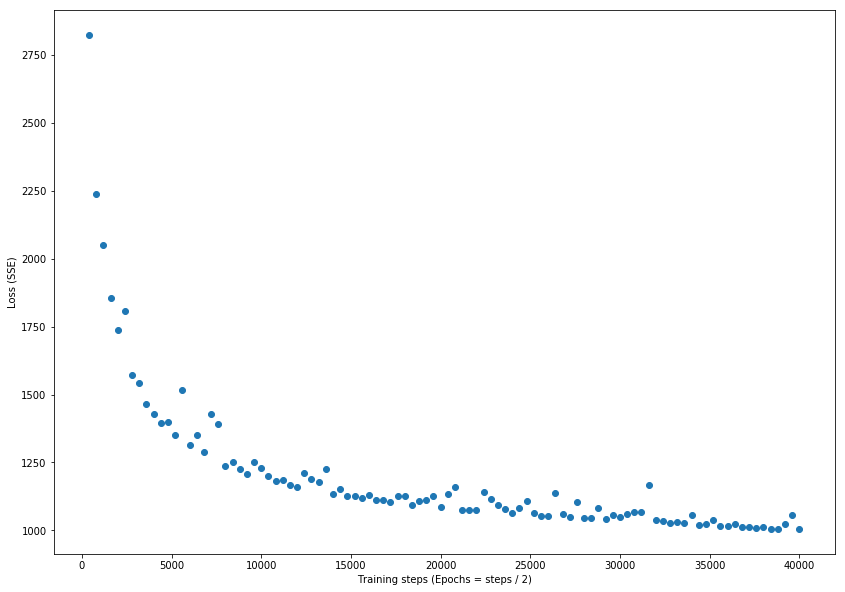

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)
plt.xlabel('Training steps (Epochs = steps / 2)')
plt.ylabel('Loss (SSE)')
plt.show()

In [14]:
pred = regressor.predict(input_fn=wx_input_fn(X_test,
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])

print("The Explained Variance: %.2f" % explained_variance_score(
                                            y_test, predictions))  
print("The Mean Absolute Error: %.2f degrees Celcius" % mean_absolute_error(
                                            y_test, predictions))  
print("The Median Absolute Error: %.2f degrees Celcius" % median_absolute_error(
                                            y_test, predictions))

INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-40000
The Explained Variance: 0.89
The Mean Absolute Error: 3.07 degrees Celcius
The Median Absolute Error: 2.45 degrees Celcius
